/Users/brandtkruger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


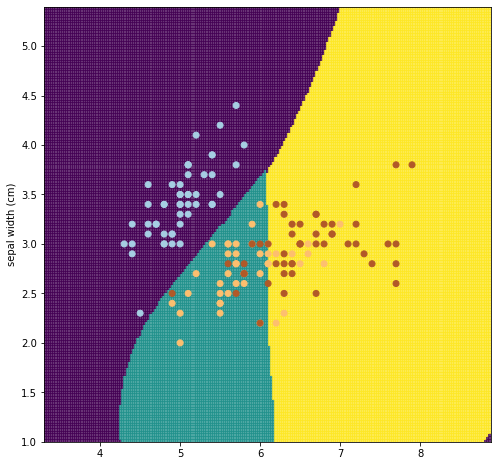

In [15]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data[:,:2], columns=iris.feature_names[:2])
y = pd.DataFrame(iris.target, columns=["species"], dtype='category')

svc=svm.SVC(kernel='rbf', C=2, gamma='auto')
x_train, x_test, y_train, y_test = train_test_split(x, np.array(y),test_size=0.3, random_state=0)
svc.fit(x_train, y_train)
x_min, x_max= x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max= x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.pcolormesh(xx, yy, Z, alpha=0.8)
ax.scatter(x.iloc[:,0], x.iloc[:,1], c=y['species'].cat.codes, cmap=plt.cm.Paired)
ax.set_ylabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
plt.show()
                 
